In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

#### Información general del set de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


#### Muestra aleatoria del set de datos

In [4]:
df.sample(5)

,id,keyword,location,text,target
4721,6712,lava,??9?,waiting for my chocolate lava cakes to get her...,0
195,274,ambulance,|| c h i c a g o ||,when you don't know which way an ambulance is ...,1
1020,1482,body%20bags,CA,HOBO Hobo Vintage Shira Convertible BÛ_ $238....,0
7187,10297,weapon,Massachusetts,BUT I will be uploading these videos ASAP so y...,0
3390,4853,evacuation,"Portland, Ore.",New evacuation ordered for 25 homes in danger ...,1


#### Descripción de variables estadísticas del set de datos

In [5]:
df.describe(include=[np.object, np.number]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613,NaN,NaN,NaN,5441.93,3137.12,1,2734,5408,8146,10873
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613,NaN,NaN,NaN,0.42966,0.49506,0,0,0,1,1


#### Conversión de tipos de datos

- `id` toma valores del rango `[1, 10873]`, entonces puede usarse el tipo `uint16`.
- `target` puede ser `0` ó `1`.

In [6]:
df['id'] = df['id'].astype(np.uint16)
df['target'] = df['target'].astype(np.uint8)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   uint16
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   uint8 
dtypes: object(3), uint16(1), uint8(1)
memory usage: 200.9+ KB


#### Verificación de duplicados

In [7]:
len(df.drop_duplicates())

7613

No hay filas duplicadas

# Análisis Exploratorio

En este análisis se intentará encontrar la relación entre las keyword y los target.

In [8]:
#Cantidad de filas del dataframe
len(df)

7613

In [9]:
#Cantidad de filas del dataframe con keywords
df["keyword"].count()

7552

In [10]:
#Porcentaje de filas con keyword respecto al total
round(df["keyword"].count()/len(df)*100, 3)

99.199

In [11]:
#Cantidad de valores diferentes de keyword junto con su frecuencia
df["keyword"].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [12]:
#Cantidad de apariciones de cada keyword en el target 1
k1 = df[df["target"]==1]["keyword"].value_counts()
k1

derailment     39
outbreak       39
wreckage       39
oil%20spill    37
debris         37
               ..
electrocute     1
ruin            1
blazing         1
body%20bag      1
epicentre       1
Name: keyword, Length: 220, dtype: int64

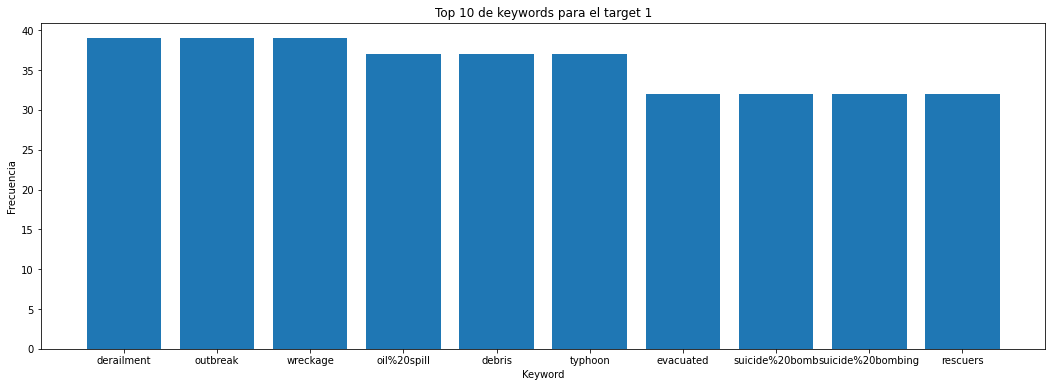

In [13]:
plt.figure(figsize=(18, 6))
plt.bar(k1.iloc[0:10].index, k1.iloc[0:10])
plt.title("Top 10 de keywords para el target 1")
plt.xlabel("Keyword")
plt.ylabel("Frecuencia")
plt.show()

In [14]:
k0 = df[df["target"]==0]["keyword"].value_counts() #Cantidad de apariciones de cada keyword en el target 0
k0

body%20bags          40
armageddon           37
harm                 37
wrecked              36
ruin                 36
                     ..
oil%20spill           1
suicide%20bomber      1
typhoon               1
outbreak              1
suicide%20bombing     1
Name: keyword, Length: 218, dtype: int64

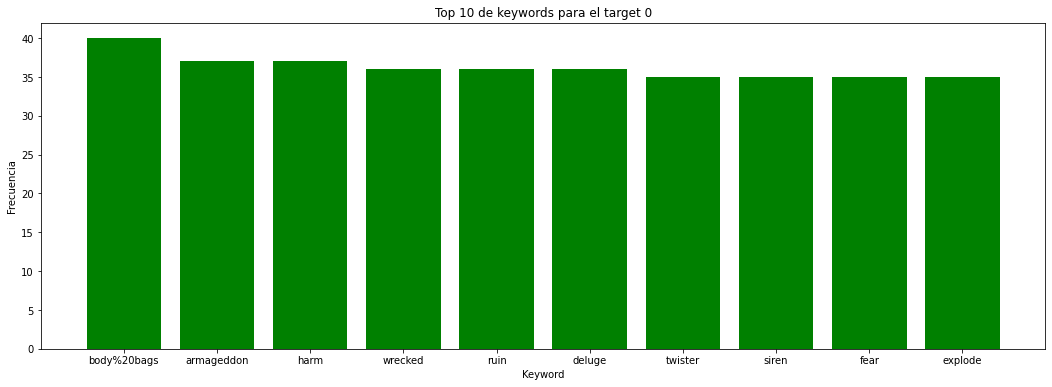

In [15]:
plt.figure(figsize=(18, 6))
plt.bar(k0.iloc[0:10].index, k0.iloc[0:10], color="green")
plt.title("Top 10 de keywords para el target 0")
plt.xlabel("Keyword")
plt.ylabel("Frecuencia")
plt.show()

In [16]:
k1_unique = pd.Series(dtype='uint8') #Indicar dtype evita warning
for k in k1.index:
    if k not in k0:
        k1_unique = k1_unique.append(pd.Series(index=(k,), data=k1[k]))

In [17]:
#Keywords que solo aparecen en el target 1
k1_unique

derailment    39
wreckage      39
debris        37
dtype: int64

In [18]:
k0_unique = pd.Series(dtype='uint8') #Indicar dtype evita warning
for k in k0.index:
    if k not in k1:
        k0_unique = k0_unique.append(pd.Series(index=(k,), data=k0[k]))

In [19]:
#Keywords que solo aparecen en el target 0
k0_unique

aftershock    34
dtype: int64

In [20]:
df_keywords_en_ambas = pd.DataFrame(columns=["keyword", "target_1", "target_0", "relacion_1_sobre_0"])

In [21]:
for x in df["keyword"].value_counts().iteritems():
    if x[0] in k1_unique.index or x[0] in k0_unique.index:
        continue
    df_keywords_en_ambas = df_keywords_en_ambas.append({"keyword":x[0], \
                                                        "target_1":k1[x[0]], \
                                                        "target_0":k0[x[0]]}, \
                                                       ignore_index=True)

In [22]:
df_keywords_en_ambas["relacion_1_sobre_0"] = (df_keywords_en_ambas["target_1"]/df_keywords_en_ambas["target_0"])

In [23]:
#Keywords que están en ambos targets junto con su cantidad en cada uno y la relación del 1 sobre 0
df_keywords_en_ambas

,keyword,target_1,target_0,relacion_1_sobre_0
0,fatalities,26,19,1.36842
1,armageddon,5,37,0.135135
2,deluge,6,36,0.166667
3,harm,4,37,0.108108
4,sinking,8,33,0.242424
...,...,...,...,...
212,forest%20fire,15,4,3.75
213,epicentre,1,11,0.0909091
214,threat,2,9,0.222222
215,inundation,2,8,0.25


In [24]:
df_keywords_casi_unicas = df_keywords_en_ambas.groupby("keyword")\
.filter(lambda x: x["relacion_1_sobre_0"].max()<0.1 or \
                  x["relacion_1_sobre_0"].max()>10)

#Keywords con una relación mayor o igual de 10 a 1 respecto de un target con otro
df_keywords_casi_unicas

,keyword,target_1,target_0,relacion_1_sobre_0
5,body%20bags,1,40,0.025
13,outbreak,39,1,39
19,wrecked,3,36,0.0833333
28,explode,3,35,0.0857143
33,oil%20spill,37,1,37
39,typhoon,37,1,37
54,ruin,1,36,0.0277778
59,panic,3,34,0.0882353
60,screaming,2,34,0.0588235
95,traumatised,2,33,0.0606061


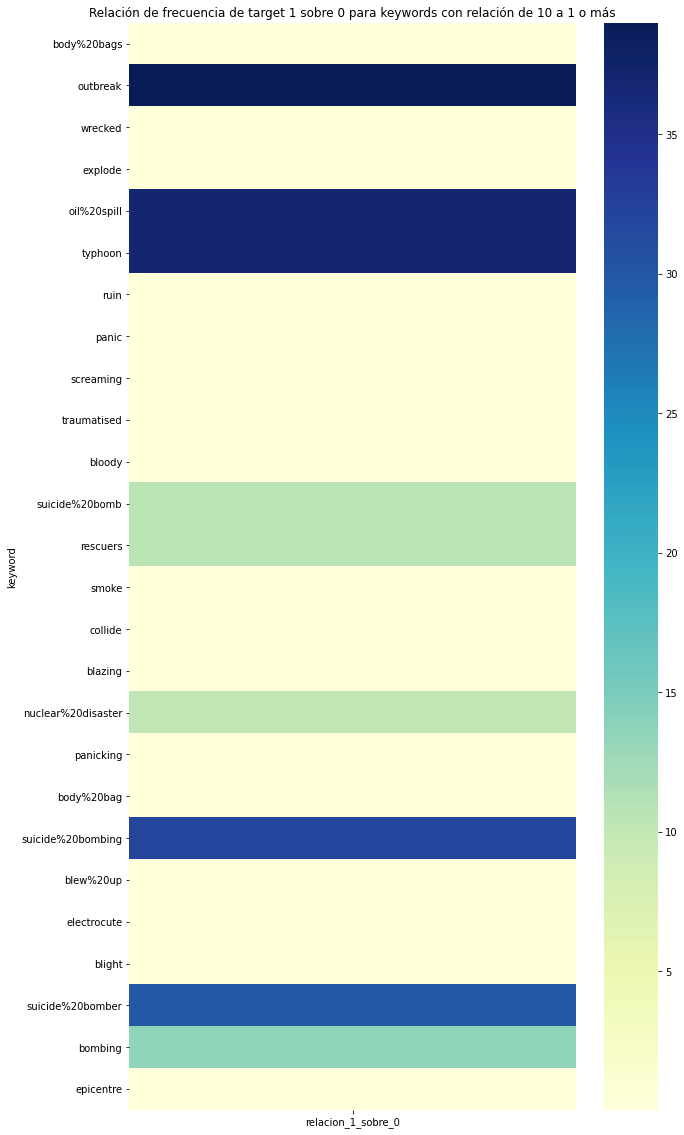

In [25]:
df_heat = df_keywords_casi_unicas.drop(["target_1", "target_0"], axis=1)
df_heat["relacion_1_sobre_0"] = df_heat["relacion_1_sobre_0"].map(lambda x:float(x))
df_heat = df_heat.set_index("keyword")
plt.figure(figsize=(10,20))
plt.title("Relación de frecuencia de target 1 sobre 0 para keywords con relación de 10 a 1 o más")
sns.heatmap(df_heat[["relacion_1_sobre_0"]], cmap="YlGnBu")
plt.show()

Como se pudo ver, hay algunas keywords que son únicas para cada target, y su cantidad es suficientemente alta como para decir que si aparece otra vez, ya sabemos a que target pertenecerá. Por otro lado hay otras que aparecen en ambos pero la cantidad es mucho mayor en uno que en otro, por lo que tenemos una alta probabilidad de adivinar si aparece nuevamente.

## Location vs. Target

En este análisis se intentará encontrar la relación entre las location y los target.

In [26]:
#Cantidad de filas del dataframe con location
df["location"].count()

5080

In [27]:
#Porcentaje de filas con location respecto al total
df["location"].count()/len(df)*100

66.72796532247472

In [28]:
#Cantidad de valores diferentes de location junto con su frecuencia
df["location"].value_counts()

USA                     104
New York                 71
United States            50
London                   45
Canada                   29
                       ... 
Washington, DC 20009      1
Pontevedra, Galicia       1
Beit El - Israel          1
Around the world          1
Anaheim                   1
Name: location, Length: 3341, dtype: int64

In [29]:
#Los 20 valores más frecuentes de location
df["location"].value_counts().nlargest(20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
New York, NY        15
California, USA     15
Everywhere          15
Florida             14
Name: location, dtype: int64

In [30]:
#Cantidad de apariciones de cada location en el target 1
k1 = df[df["target"]==1]["location"].value_counts()
k1

USA                            67
United States                  27
Nigeria                        22
India                          20
Mumbai                         19
                               ..
london                          1
GO BLUE! HAIL YES!!             1
Ile-Ife,Osun state, Nigeria     1
ÌÏT: 6.4682,3.18287             1
Anaheim                         1
Name: location, Length: 1513, dtype: int64

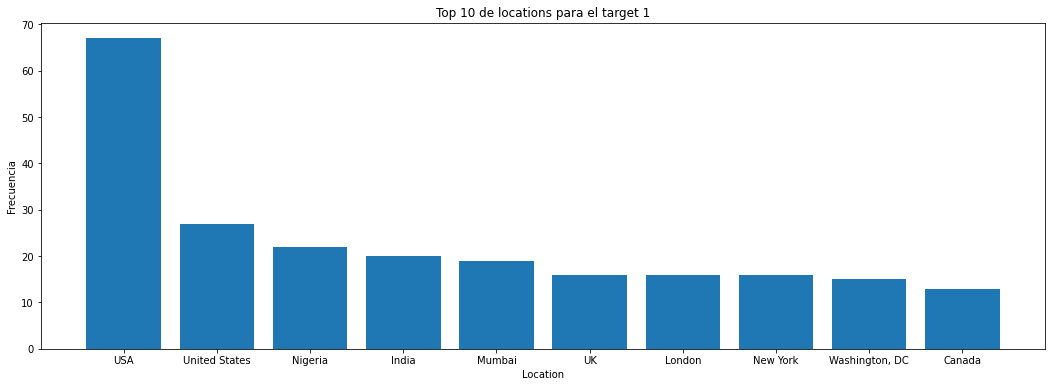

In [31]:
plt.figure(figsize=(18, 6))
plt.bar(k1.iloc[0:10].index, k1.iloc[0:10])
plt.title("Top 10 de locations para el target 1")
plt.xlabel("Location")
plt.ylabel("Frecuencia")
plt.show()

In [32]:
#Cantidad de apariciones de cada location en el target 0
k0 = df[df["target"]==0]["location"].value_counts()
k0

New York                          55
USA                               37
London                            29
United States                     23
Los Angeles, CA                   18
                                  ..
North West London                  1
London / Birmingham                1
St.Cloud, MN                       1
Someday I'll live in England.      1
|-/                                1
Name: location, Length: 2142, dtype: int64

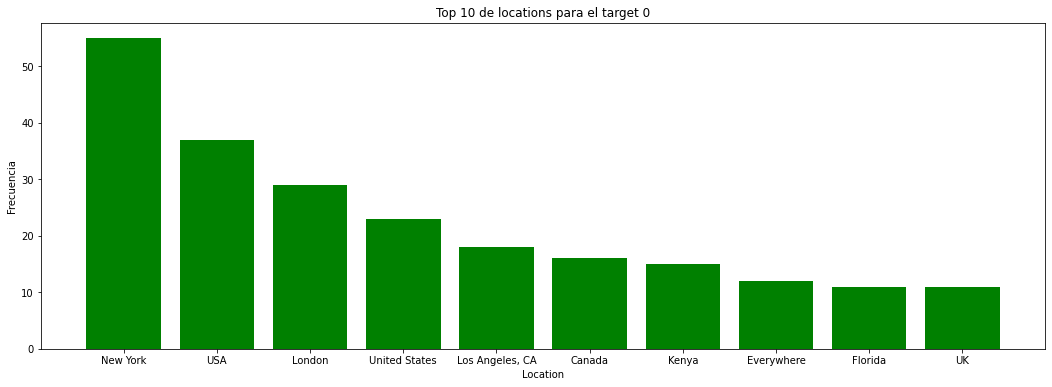

In [33]:
plt.figure(figsize=(18, 6))
plt.bar(k0.iloc[0:10].index, k0.iloc[0:10], color="green")
plt.title("Top 10 de locations para el target 0")
plt.xlabel("Location")
plt.ylabel("Frecuencia")
plt.show()

In [34]:
k1_unique = pd.Series(dtype='uint8') #Indicar dtype evita warning
for k in k1.index:
    if k not in k0:
        k1_unique = k1_unique.append(pd.Series(index=(k,), data=k1[k]))

In [35]:
#Locations que solo aparecen en el target 1
k1_unique

Nairobi-KENYA                  4
Midwest                        4
Portland, Oregon               4
Sacramento                     4
Bend, Oregon                   4
                              ..
Traverse City, MI              1
GO BLUE! HAIL YES!!            1
Ile-Ife,Osun state, Nigeria    1
ÌÏT: 6.4682,3.18287            1
Anaheim                        1
Length: 1199, dtype: int64

In [36]:
k0_unique = pd.Series(dtype='uint8') #Indicar dtype evita warning
for k in k0.index:
    if k not in k1:
        k0_unique = k0_unique.append(pd.Series(index=(k,), data=k0[k]))

In [37]:
#Locations que solo aparecen en el target 0
k0_unique

304                               9
Pennsylvania, USA                 7
Morioh, Japan                     6
Indiana                           5
Wisconsin                         5
                                 ..
North West London                 1
London / Birmingham               1
St.Cloud, MN                      1
Someday I'll live in England.     1
|-/                               1
Length: 1828, dtype: int64

Al ver estos datos, nos damos cuenta que el valor que aparece en location no tiene un criterio bien especificado, ya que por ejemplo tenemos valores de Nueva York como clave en minúscula y también en mayúscula y en otros aparece como ciudad, lo que no sirve para identificar si los anteriores se refieren al estado o a la ciudad y por otro lado hay claves con el valor del país, el cual incluye a muchos lugares como el mencionado, y muchos otros valores que solo aparecen una vez y no se pueden identificar como "Loading..." u otros como "Worldwide" no sirven para hacer un análisis sobre este campo y por lo tanto se limita mucho las cosas para lo que se puede usar.

## Palabras frecuentes

A continuación se verán cuáles son las palabras más repetidas para cada target y si podemos obtener conclusiones de ello.

In [38]:
df["text"] = df["text"].transform(lambda x: x.lower().split())

In [39]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, #eart...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask., canada]",1
2,5,NaN,NaN,"[all, residents, asked, to, 'shelter, in, plac...",1
3,6,NaN,NaN,"[13,000, people, receive, #wildfires, evacuati...",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, #al...",1


In [40]:
s = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df["text"]:
    s = s.append(pd.Series(x))

In [41]:
s[0:10]

0            our
1          deeds
2            are
3            the
4         reason
5             of
6           this
7    #earthquake
8            may
9          allah
dtype: object

In [42]:
s.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113461 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       113461 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [43]:
from collections import Counter

In [44]:
#50 palabras más comunes
Counter(s).most_common(50)

[('the', 3207),
 ('a', 2135),
 ('in', 1949),
 ('to', 1934),
 ('of', 1814),
 ('and', 1405),
 ('i', 1336),
 ('is', 930),
 ('for', 880),
 ('on', 834),
 ('-', 763),
 ('you', 746),
 ('my', 671),
 ('with', 562),
 ('that', 538),
 ('at', 532),
 ('by', 514),
 ('it', 504),
 ('this', 463),
 ('from', 420),
 ('are', 397),
 ('be', 396),
 ('was', 381),
 ('have', 380),
 ('like', 341),
 ('as', 327),
 ('just', 313),
 ('but', 311),
 ('so', 310),
 ('&amp;', 295),
 ('up', 292),
 ('not', 288),
 ('your', 287),
 ('me', 275),
 ('after', 256),
 ('will', 254),
 ('has', 247),
 ('an', 243),
 ('all', 241),
 ('no', 239),
 ('out', 239),
 ("i'm", 237),
 ('when', 237),
 ('if', 234),
 ('get', 227),
 ('we', 223),
 ('new', 215),
 ('??', 214),
 ('via', 214),
 ('about', 213)]

In [45]:
s1 = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df[df["target"]==1]["text"]:
    s1 = s1.append(pd.Series(x))

In [46]:
s1[0:10]

0            our
1          deeds
2            are
3            the
4         reason
5             of
6           this
7    #earthquake
8            may
9          allah
dtype: object

In [47]:
#50 palabras más comunes del target 1
Counter(s1).most_common(50)

[('the', 1330),
 ('in', 1144),
 ('of', 919),
 ('a', 897),
 ('to', 753),
 ('and', 494),
 ('on', 410),
 ('for', 394),
 ('-', 389),
 ('is', 344),
 ('at', 303),
 ('i', 284),
 ('by', 274),
 ('from', 243),
 ('with', 188),
 ('that', 181),
 ('after', 181),
 ('this', 177),
 ('as', 167),
 ('are', 166),
 ('was', 165),
 ('it', 163),
 ('fire', 151),
 ('have', 140),
 ('my', 130),
 ('over', 123),
 ('you', 121),
 ('more', 121),
 ('via', 117),
 ('up', 114),
 ('an', 113),
 ('be', 112),
 ('...', 106),
 ('&amp;', 105),
 ('has', 104),
 ('suicide', 103),
 ('who', 100),
 ('no', 99),
 ('disaster', 97),
 ('but', 95),
 ('police', 94),
 ('people', 93),
 ('been', 93),
 ('when', 93),
 ('killed', 92),
 ('like', 91),
 ('not', 90),
 ('california', 88),
 ('than', 85),
 ('just', 84)]

In [48]:
s0 = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df[df["target"]==0]["text"]:
    s0 = s0.append(pd.Series(x))

In [49]:
s0[0:10]

0    what's
1        up
2      man?
0         i
1      love
2    fruits
0    summer
1        is
2    lovely
0        my
dtype: object

In [50]:
#50 palabras más comunes del target 0
Counter(s0).most_common(50)

[('the', 1877),
 ('a', 1238),
 ('to', 1181),
 ('i', 1052),
 ('and', 911),
 ('of', 895),
 ('in', 805),
 ('you', 625),
 ('is', 586),
 ('my', 541),
 ('for', 486),
 ('on', 424),
 ('with', 374),
 ('-', 374),
 ('that', 357),
 ('it', 341),
 ('this', 286),
 ('be', 284),
 ('like', 250),
 ('have', 240),
 ('by', 240),
 ('so', 235),
 ('are', 231),
 ('at', 229),
 ('just', 229),
 ('your', 225),
 ('me', 221),
 ('was', 216),
 ('but', 216),
 ('not', 198),
 ("i'm", 195),
 ('&amp;', 190),
 ('??', 183),
 ('out', 179),
 ('up', 178),
 ('will', 177),
 ('if', 177),
 ('from', 177),
 ('all', 173),
 ('new', 163),
 ('get', 161),
 ('as', 160),
 ('or', 155),
 ('we', 148),
 ('when', 144),
 ('has', 143),
 ('he', 143),
 ('no', 140),
 ('about', 139),
 ('they', 133)]

Como vemos, las palabras más repetidas son las "stopwords", lo cual es lógico, pero también aparecen otras expresiones que pueden destacarse en el target 1 como "fire", "suicide", "disaster", "police" y estas aparecen muchas veces y están entre las 50 más comunes de este target, pero no así para las 50 primeras del target 0, que se parece más al combinado total. 

## Hashtags y Menciones

A continuación veremos la cantidad de hastags y menciones que hay en los datos y si guardan alguna relación con los targets.

In [51]:
df = pd.read_csv('train.csv')

In [52]:
df["text"] = df["text"].map(lambda x:x.split()) 
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[Our, Deeds, are, the, Reason, of, this, #eart...",1
1,4,NaN,NaN,"[Forest, fire, near, La, Ronge, Sask., Canada]",1
2,5,NaN,NaN,"[All, residents, asked, to, 'shelter, in, plac...",1
3,6,NaN,NaN,"[13,000, people, receive, #wildfires, evacuati...",1
4,7,NaN,NaN,"[Just, got, sent, this, photo, from, Ruby, #Al...",1


### Hashtags 

In [53]:
def contar_hashtags(x):
    contador = 0
    for i in x:
        if i[0] == '#' and len(i) > 0:
            contador += 1
    return contador

df["nro_hashtags_en_tweet"] = df["text"].map(contar_hashtags)

In [54]:
#Número total de tweets con hashtags
df["nro_hashtags_en_tweet"].map(lambda x: 1 if x>0 else 0).sum()

1734

In [55]:
#Número total de hashtags
df["nro_hashtags_en_tweet"].sum()

3340

In [56]:
#Cantidad de tweets con más de un hashtag
df["nro_hashtags_en_tweet"].map(lambda x: True if x>1 else False).sum()

781

In [57]:
#Frecuencias de las distintas cantidades de hashtags por tweet
df["nro_hashtags_en_tweet"].value_counts()

0     5879
1      953
2      398
3      203
4       83
5       38
6       26
10      10
7        8
8        7
13       4
11       2
9        2
Name: nro_hashtags_en_tweet, dtype: int64

In [58]:
#Frecuencias de nro. de hashtags en tweet por target
df.groupby(["nro_hashtags_en_tweet", "target"]).agg("count")["id"]

nro_hashtags_en_tweet  target
0                      0         3465
                       1         2414
1                      0          478
                       1          475
2                      0          201
                       1          197
3                      0          108
                       1           95
4                      0           43
                       1           40
5                      0           17
                       1           21
6                      0           18
                       1            8
7                      0            4
                       1            4
8                      0            1
                       1            6
9                      0            2
10                     0            3
                       1            7
11                     0            2
13                     1            4
Name: id, dtype: int64

In [59]:
hashtags = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df["text"]:
    for i in x:
        if i[0] == '#':
            hashtags = hashtags.append(pd.Series(i))

In [60]:
hashtags

0    #earthquake
0     #wildfires
0        #Alaska
0     #wildfires
0     #RockyFire
        ...     
0        #iPhone
0      #breaking
0            #LA
0     #WorldNews
0    #stormchase
Length: 3340, dtype: object

In [61]:
top_10_hashtags = Counter(hashtags).most_common(10)
#Top 10 hashtags con frecuencias
top_10_hashtags

[('#news', 36),
 ('#News', 36),
 ('#hot', 30),
 ('#prebreak', 30),
 ('#best', 30),
 ('#???', 23),
 ('#??', 20),
 ('#Hiroshima', 20),
 ('#GBBO', 16),
 ('#terrorism', 11)]

In [62]:
cant_top_10_hashtags_por_target = []
for x in top_10_hashtags:
    cant_top_10_hashtags_por_target.append([x[0], 0, 0])

In [63]:
index = 0
for x in df["text"]:
    for i in x:
        if i in [j[0] for j in top_10_hashtags]:
            if df.loc[index]["target"] == 0:
                cant_top_10_hashtags_por_target[[j[0] for j in top_10_hashtags].index(i)][1] += 1
            else:
                cant_top_10_hashtags_por_target[[j[0] for j in top_10_hashtags].index(i)][2] += 1
    index += 1

In [64]:
#Top 10 hashtags con frecuencias por target (0, 1)
cant_top_10_hashtags_por_target

[['#news', 15, 21],
 ['#News', 5, 31],
 ['#hot', 17, 13],
 ['#prebreak', 17, 13],
 ['#best', 17, 13],
 ['#???', 0, 23],
 ['#??', 1, 19],
 ['#Hiroshima', 0, 20],
 ['#GBBO', 12, 4],
 ['#terrorism', 3, 8]]

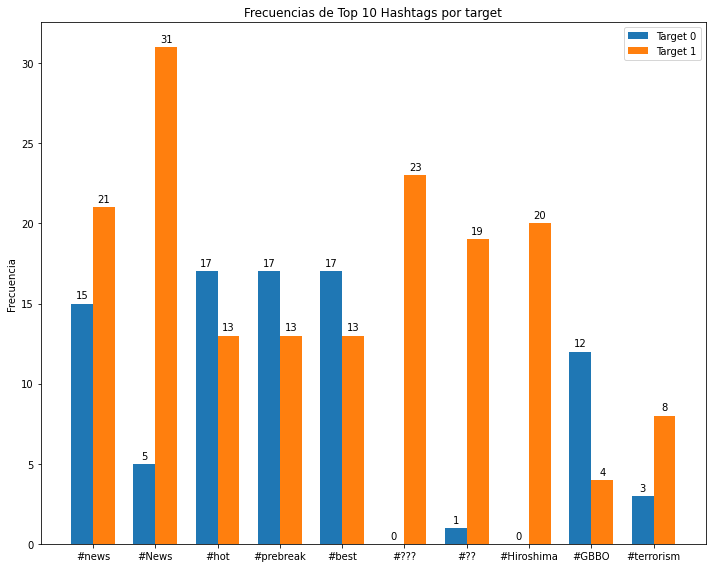

In [65]:
ancho = 0.35
x = pd.array(range(len(cant_top_10_hashtags_por_target)))
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
rects1 = ax.bar(x - ancho/2, [i[1] for i in cant_top_10_hashtags_por_target], ancho, label='Target 0')
rects2 = ax.bar(x + ancho/2, [i[2] for i in cant_top_10_hashtags_por_target], ancho, label='Target 1')

ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencias de Top 10 Hashtags por target')
ax.set_xticks(x)
ax.set_xticklabels([i[0] for i in cant_top_10_hashtags_por_target])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Viendo los resultados de los hashtags, nos damos cuenta de que la mayoría no contiene ninguno, y de los demás que si contienen, vemos que algunos tweets son puros hashtags (hasta 13 hashtags en 1 tweet). Luego, dentro de los hashtags más frecuentes vemos que algunos están completamente desbalanceados según el target, como "News" o "???" lo que puede servir a futuro para realizar predicciones.

### Menciones 

In [66]:
def contar_menciones(x):
    contador = 0
    for i in x:
        if i[0] == '@' and len(i) > 0:
            contador += 1
    return contador

df["nro_menciones_en_tweet"] = df["text"].map(contar_menciones)

In [67]:
#Número total de tweets con menciones
df["nro_menciones_en_tweet"].map(lambda x: 1 if x>0 else 0).sum()

1985

In [68]:
#Número total de menciones
df["nro_menciones_en_tweet"].sum()

2664

In [69]:
#Cantidad de tweets con más de una mención
df["nro_menciones_en_tweet"].map(lambda x: True if x>1 else False).sum()

468

In [70]:
#Frecuencias de las distintas cantidades de menciones por tweet
df["nro_menciones_en_tweet"].value_counts()

0    5628
1    1517
2     341
3      76
4      28
5      16
6       5
7       1
8       1
Name: nro_menciones_en_tweet, dtype: int64

In [71]:
#Frecuencias de nro. de menciones en tweet por target
df.groupby(["nro_menciones_en_tweet", "target"]).agg("count")["id"]

nro_menciones_en_tweet  target
0                       0         3011
                        1         2617
1                       0         1016
                        1          501
2                       0          235
                        1          106
3                       0           41
                        1           35
4                       0           19
                        1            9
5                       0           13
                        1            3
6                       0            5
7                       0            1
8                       0            1
Name: id, dtype: int64

In [72]:
menciones = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df["text"]:
    for i in x:
        if i[0] == '@':
            menciones = menciones.append(pd.Series(i))

In [73]:
menciones

0            @bbcmtd
0        @PhDSquares
0    @southridgelife
0               @Û_
0          @Navista7
          ...       
0     @cameronhacker
0        @engineshed
0     @LivingSafely:
0       @aria_ahrary
0       @TheTawniest
Length: 2664, dtype: object

In [74]:
top_10_menciones = Counter(menciones).most_common(10)
#Top 10 menciones con frecuencias
top_10_menciones

[('@YouTube', 82),
 ('@', 27),
 ('@ArianaGrande', 11),
 ('@POTUS', 9),
 ('@Change', 9),
 ('@FoxNews', 9),
 ('@emmerdale', 8),
 ('@djicemoon', 7),
 ('@justinbieber', 7),
 ('@MikeParrActor', 6)]

In [75]:
cant_top_10_menciones_por_target = []
for x in top_10_menciones:
    cant_top_10_menciones_por_target.append([x[0], 0, 0])

In [76]:
index = 0
for x in df["text"]:
    for i in x:
        if i in [j[0] for j in top_10_menciones]:
            if df.loc[index]["target"] == 0:
                cant_top_10_menciones_por_target[[j[0] for j in top_10_menciones].index(i)][1] += 1
            else:
                cant_top_10_menciones_por_target[[j[0] for j in top_10_menciones].index(i)][2] += 1
    index += 1

In [77]:
#Top 10 menciones con frecuencias por target (0, 1)
cant_top_10_menciones_por_target

[['@YouTube', 65, 17],
 ['@', 18, 9],
 ['@ArianaGrande', 11, 0],
 ['@POTUS', 3, 6],
 ['@Change', 5, 4],
 ['@FoxNews', 1, 8],
 ['@emmerdale', 7, 1],
 ['@djicemoon', 7, 0],
 ['@justinbieber', 7, 0],
 ['@MikeParrActor', 6, 0]]

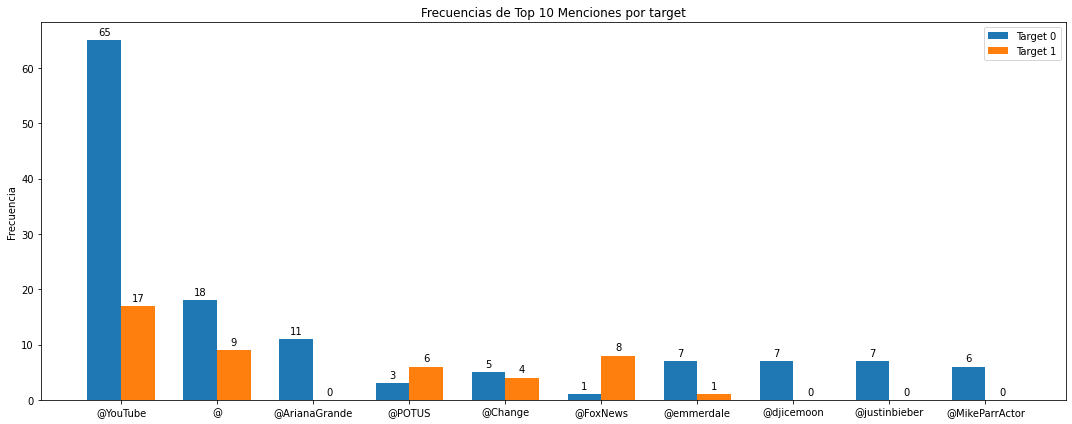

In [78]:
ancho = 0.35
x = pd.array(range(len(cant_top_10_menciones_por_target)))
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
rects1 = ax.bar(x - ancho/2, [i[1] for i in cant_top_10_menciones_por_target], ancho, label='Target 0')
rects2 = ax.bar(x + ancho/2, [i[2] for i in cant_top_10_menciones_por_target], ancho, label='Target 1')

ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencias de Top 10 Menciones por target')
ax.set_xticks(x)
ax.set_xticklabels([i[0] for i in cant_top_10_menciones_por_target])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

En las menciones vemos que la cantidad de tweets que las contienen es un poquito mayor que en los hashtags y vemos una distribución más pareja en cantidad de menciones por tweet. En cuento a las menciones más repetidas vemos que los números totales son mucho más bajos y por lo tanto las frecuencias no son tan grandes como para sacar conclusiones relevantes.